In [1]:
!pip install tensorflow

In [3]:
#importing libraries 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# Load MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN (adding channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("Training data shape:", x_train.shape)

Training data shape: (60000, 28, 28, 1)


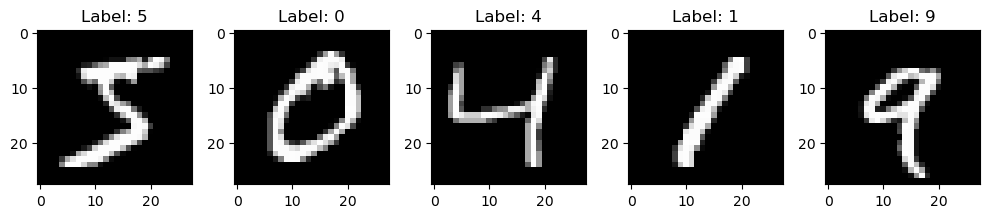

In [7]:
# visualize data
# Plot first 5 images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f'Label: {y_train[i]}')
plt.tight_layout()
plt.show()

In [9]:
#create model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

C:\Users\jiyap\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#training 
# Training parameters
batch_size = 64
epochs = 5

# Training history
history = model.fit(x_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 51ms/step - accuracy: 0.8492 - loss: 0.4802 - val_accuracy: 0.9832 - val_loss: 0.0501
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.9742 - loss: 0.0867 - val_accuracy: 0.9891 - val_loss: 0.0344
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.9820 - loss: 0.0598 - val_accuracy: 0.9891 - val_loss: 0.0321
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9854 - loss: 0.0496 - val_accuracy: 0.9901 - val_loss: 0.0299
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9884 - loss: 0.0382 - val_accuracy: 0.9917 - val_loss: 0.0262


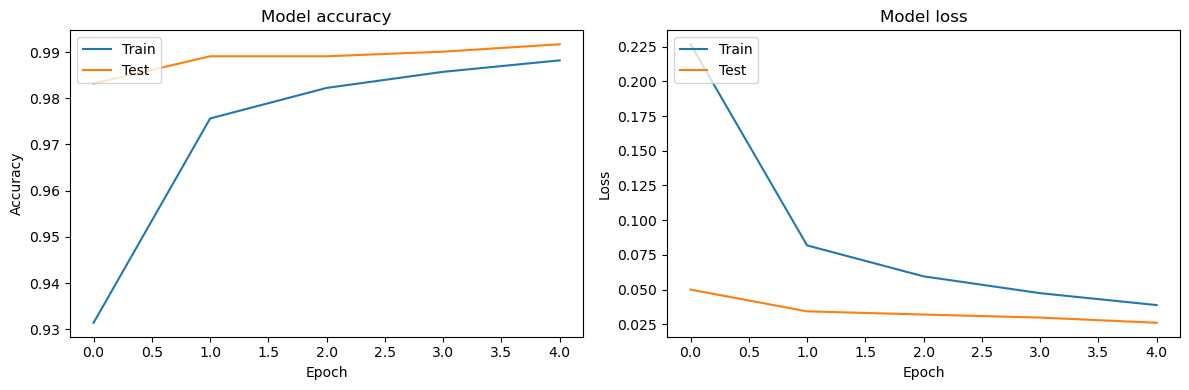

In [13]:
#visualize results
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


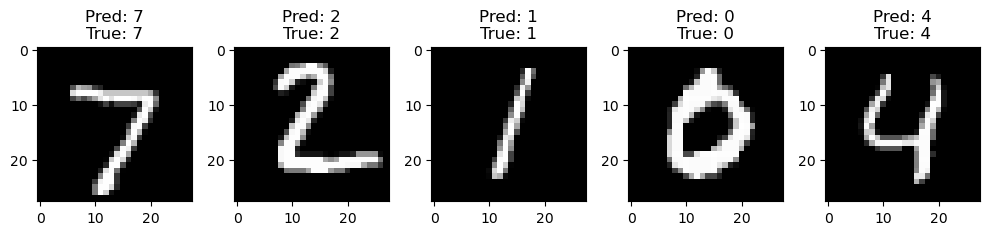

In [15]:
#test predictions
# Make predictions on test data
predictions = model.predict(x_test[:5])
predicted_labels = tf.argmax(predictions, axis=1)

# Plot first 5 test images with predictions
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f'Pred: {predicted_labels[i]}\nTrue: {y_test[i]}')
plt.tight_layout()
plt.show()

In [17]:
# Save the model
model.save('mnist_model.h5')
print("Model saved successfully!")

Model saved successfully!


In [19]:
# Add data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

# Modify model to include augmentation
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # ... rest of your model layers ...
])

In [27]:
# Add early stopping
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Example input dimensions (28x28 images)
input_shape = (28, 28, 1)  # Shape of the input images

# Define the model
model = keras.Sequential([
    layers.Flatten(input_shape=input_shape),  # Flatten the input
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

# Compile the model
model.compile(optimizer='adam',              # Specify the optimizer
              loss='mean_squared_error',    # Specify the loss function
              metrics=['mae'])              # Specify any metrics to track

# Add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Ensure y_train and y_test are reshaped correctly if needed
# y_train = y_train.reshape(-1, 1)  # Uncomment if y_train is not already in shape [num_samples, 1]
# y_test = y_test.reshape(-1, 1)    # Uncomment if y_test is not already in shape [num_samples, 1]

# Modify training
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)


C:\Users\jiyap\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 4.2960 - mae: 1.5046 - val_loss: 1.2211 - val_mae: 0.7420
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.0924 - mae: 0.6941 - val_loss: 0.9056 - val_mae: 0.6036
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.8124 - mae: 0.5762 - val_loss: 0.7430 - val_mae: 0.5283
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.6294 - mae: 0.4917 - val_loss: 0.6849 - val_mae: 0.4892
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.5475 - mae: 0.4458 - val_loss: 0.6015 - val_mae: 0.4416
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4675 - mae: 0.4087 - val_loss: 0.5923 - val_mae: 0.4247
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4262 - mae: 0.3847 - val_loss: 0.5470 - val_mae: 0.4048
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3727 - mae: 0.3566 - val_loss: 0.5409 - val_mae: 0.4007
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


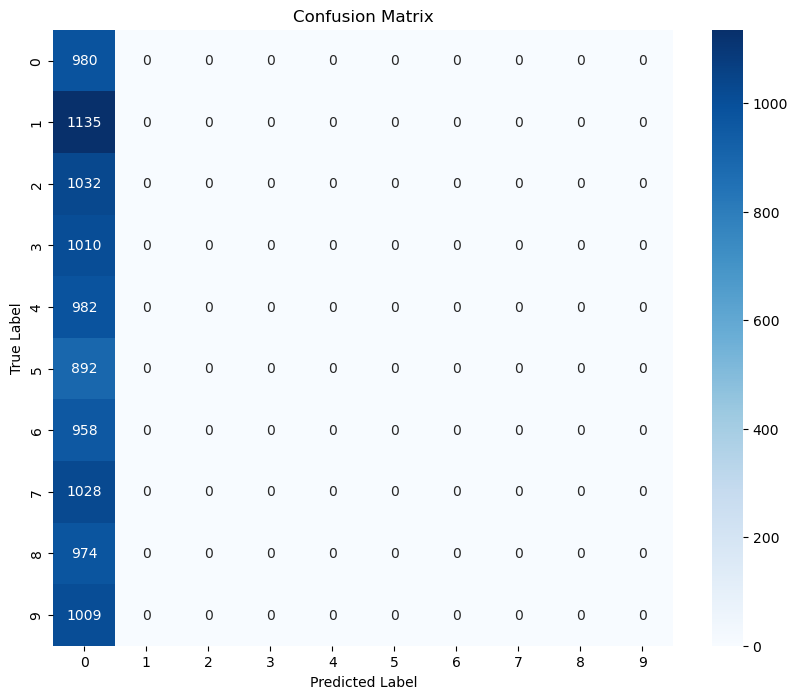

In [29]:
#Add Confusion Matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [33]:
!pip freeze > requirements.txt

In [35]:
# test final model
#Load and test saved model
loaded_model = tf.keras.models.load_model('mnist_model.h5')

# Test on new data
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test)
print(f"Final Test Accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9892 - loss: 0.0334
Final Test Accuracy: 99.17%
